In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm

Loading data

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

Preprocessing

In [12]:
data_clean = data.drop(columns = ['artists', 'id', 'name', 'release_date', 'explicit'])

In [13]:
data_clean.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920


In [14]:
data_clean = data_clean.drop_duplicates()

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170752 entries, 0 to 174387
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      170752 non-null  float64
 1   danceability      170752 non-null  float64
 2   duration_ms       170752 non-null  int64  
 3   energy            170752 non-null  float64
 4   instrumentalness  170752 non-null  float64
 5   key               170752 non-null  int64  
 6   liveness          170752 non-null  float64
 7   loudness          170752 non-null  float64
 8   mode              170752 non-null  int64  
 9   popularity        170752 non-null  int64  
 10  speechiness       170752 non-null  float64
 11  tempo             170752 non-null  float64
 12  valence           170752 non-null  float64
 13  year              170752 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 19.5 MB


Correlation matrix

In [16]:
data_clean.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.259057,-0.087170,-0.748664,0.227373,-0.027472,-0.031257,-0.542149,0.061995,-0.412460,-0.022524,-0.220627,-0.166812,-0.606799
danceability,-0.259057,1.000000,-0.104816,0.201112,-0.221076,0.026105,-0.109425,0.245775,-0.045933,0.131392,0.241492,0.002468,0.541838,0.149088
duration_ms,-0.087170,-0.104816,1.000000,0.058688,0.102861,0.001378,0.030858,0.018640,-0.046034,0.028130,-0.098814,-0.009525,-0.184455,0.106610
energy,-0.748664,0.201112,0.058688,1.000000,-0.179937,0.035248,0.136838,0.777229,-0.052996,0.343773,-0.114275,0.264234,0.326646,0.541268
instrumentalness,0.227373,-0.221076,0.102861,-0.179937,1.000000,-0.005251,-0.045424,-0.317845,-0.054615,-0.295201,-0.133265,-0.068716,-0.212322,-0.126377
key,-0.027472,0.026105,0.001378,0.035248,-0.005251,1.000000,-0.003295,0.024510,-0.126628,0.002328,0.010046,0.005783,0.025281,0.019618
liveness,-0.031257,-0.109425,0.030858,0.136838,-0.045424,-0.003295,1.000000,0.063458,0.001472,-0.083778,0.122497,0.009535,-0.007262,-0.008488
loudness,-0.542149,0.245775,0.018640,0.777229,-0.317845,0.024510,0.063458,1.000000,-0.016358,0.349386,-0.217324,0.215978,0.300335,0.464781
mode,0.061995,-0.045933,-0.046034,-0.052996,-0.054615,-0.126628,0.001472,-0.016358,1.000000,0.003324,-0.041392,0.003297,0.022001,-0.045310
popularity,-0.412460,0.131392,0.028130,0.343773,-0.295201,0.002328,-0.083778,0.349386,0.003324,1.000000,-0.200796,0.098209,0.059477,0.550284


In [17]:
Y_data = data_clean['popularity']
X_data = data_clean.drop(['popularity', 'key', 'mode'], axis = 1)

In [18]:
X_data.shape

(170752, 11)

Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV

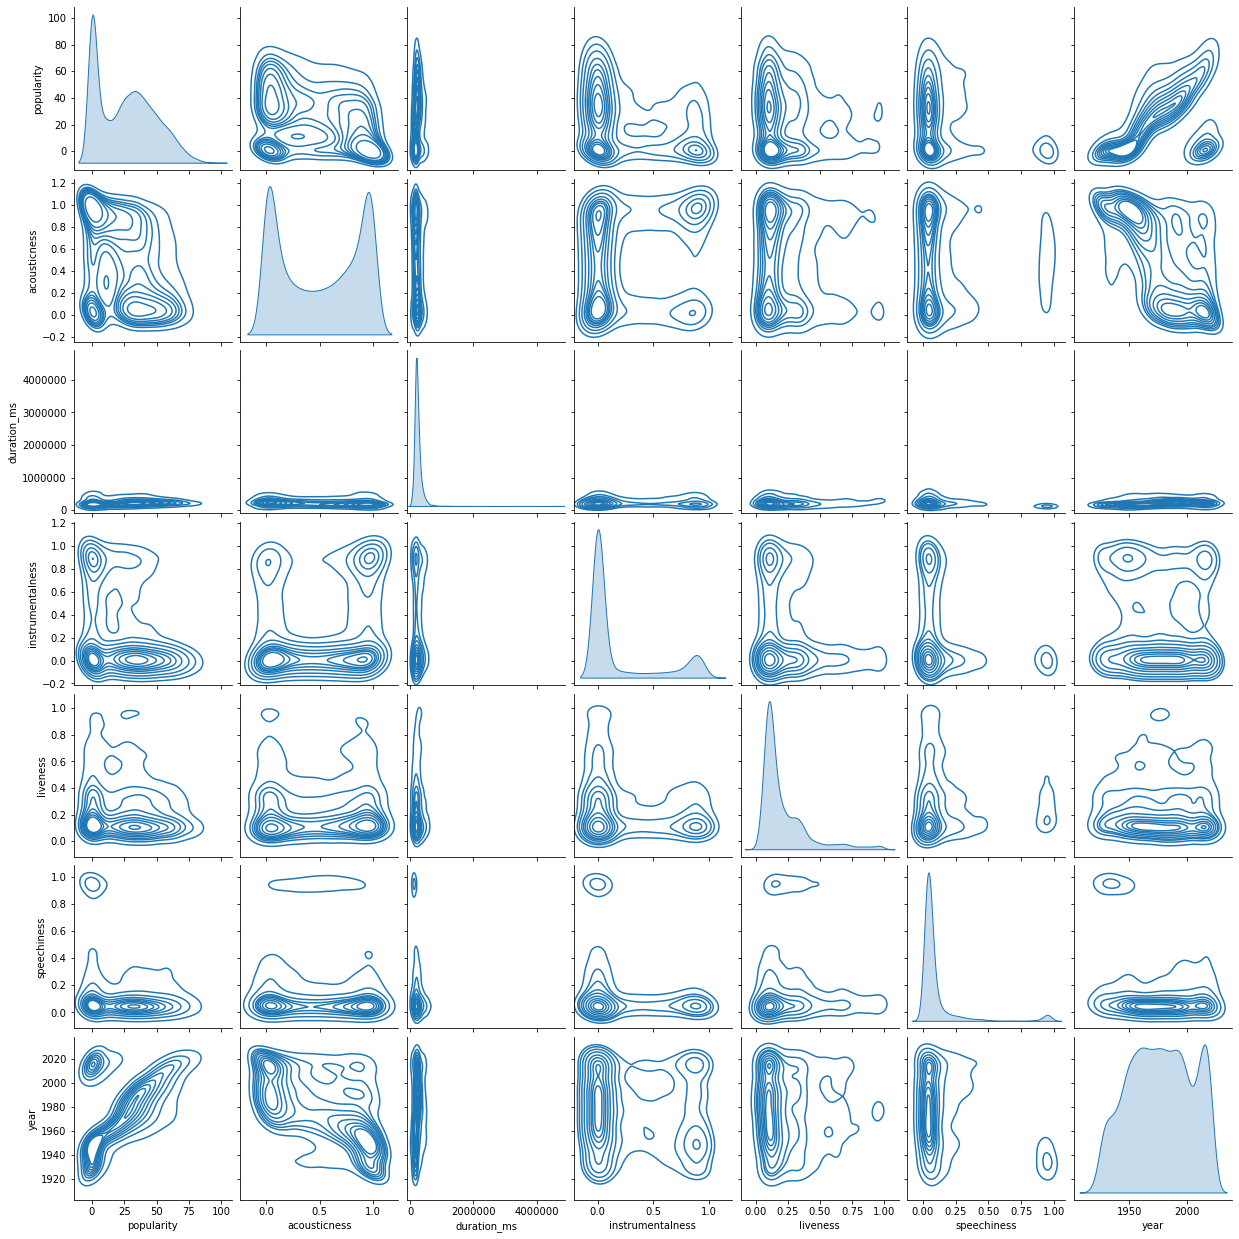

In [19]:
sns_plot = sns.pairplot(data_clean.sample(10000), vars=['popularity', 'acousticness', 'duration_ms', 'instrumentalness',
                                                           'liveness', 'speechiness', 'year'],  kind="kde") 

plt.savefig('kde.png')

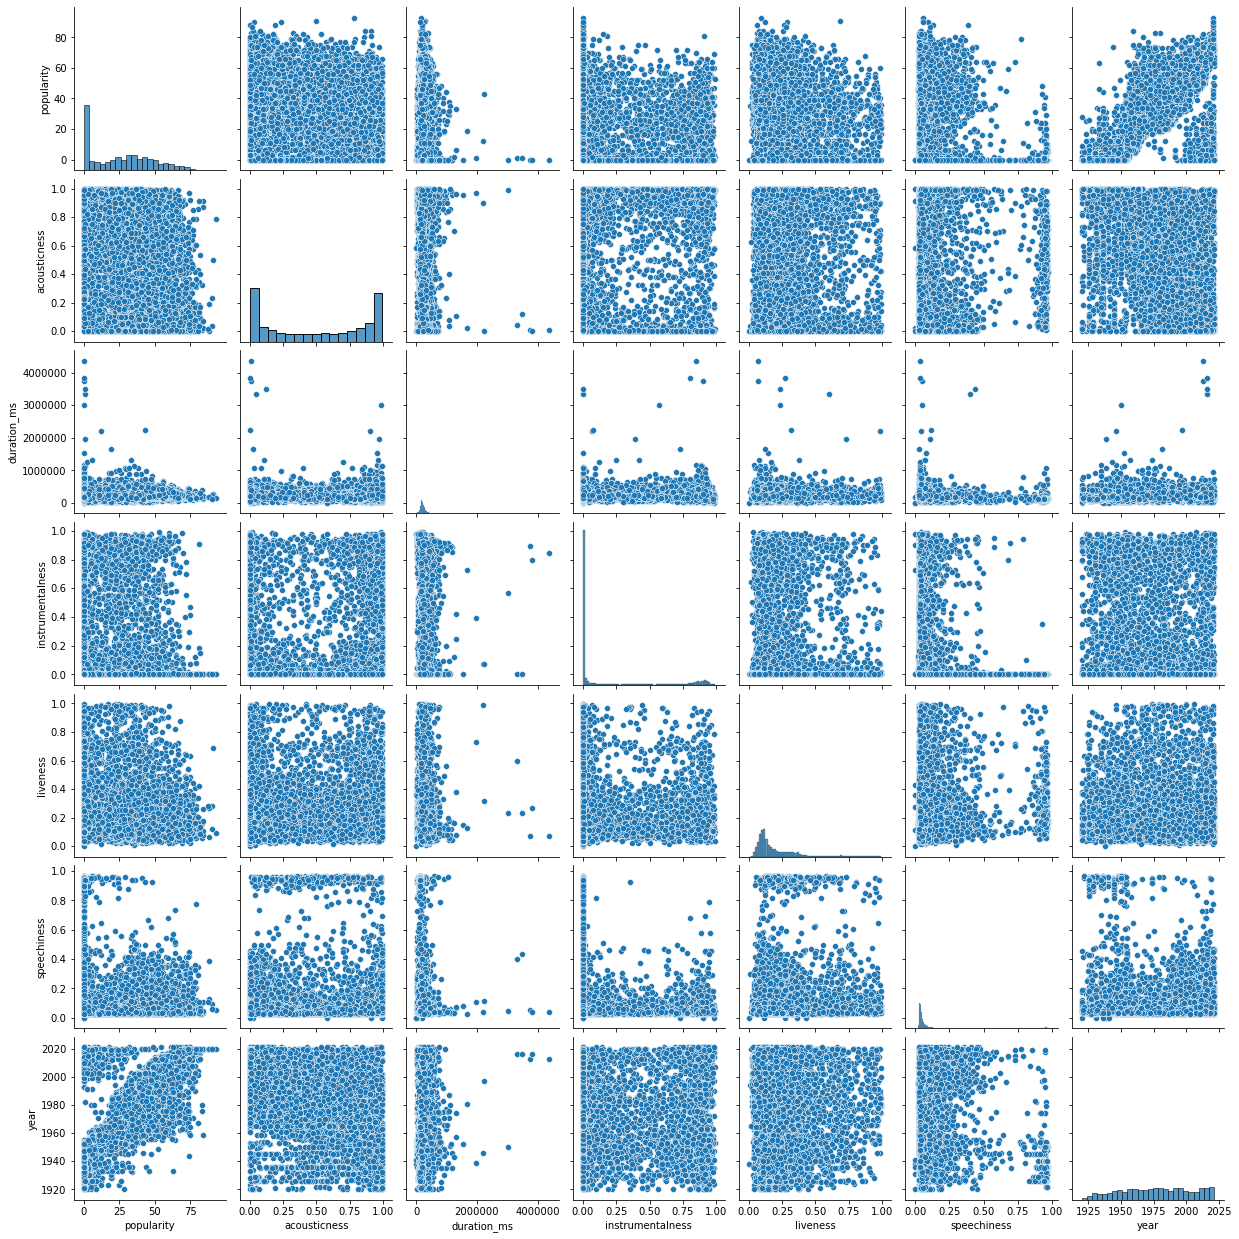

In [20]:
sns_plot = sns.pairplot(data_clean.sample(10000), vars=['popularity', 'acousticness', 'duration_ms', 'instrumentalness',
                                                       'liveness', 'speechiness', 'year']) 

plt.savefig('NPE_PDF.png')

Estimation of multivariate mathematical expectation and variance

In [21]:
X_data_short = X_data[['acousticness', 'duration_ms', 'instrumentalness', 'liveness', 'speechiness', 'year']]

In [27]:
pd.DataFrame(X_data_short.apply(np.mean), columns = ['Mean'])

,Mean
acousticness,0.501607
duration_ms,232528.712935
instrumentalness,0.192943
liveness,0.211658
speechiness,0.106192
year,1976.548439


In [28]:
pd.DataFrame(X_data_short.apply(np.mean), columns = ['Mean'])

,Mean
acousticness,0.501607
duration_ms,232528.712935
instrumentalness,0.192943
liveness,0.211658
speechiness,0.106192
year,1976.548439


In [29]:
Y_data.mean()

26.14413301161919

In [30]:
pd.DataFrame(X_data.apply(np.var), columns = ['Variance'])

,Variance
acousticness,1.435414e-01
danceability,3.083490e-02
duration_ms,2.169758e+10
energy,7.385027e-02
instrumentalness,1.098626e-01
liveness,3.273508e-02
loudness,3.215179e+01
speechiness,3.375348e-02
tempo,9.172303e+02
valence,6.977454e-02


In [31]:
pd.DataFrame(X_data_short.apply(np.var), columns = ['Variance'])

,Variance
acousticness,1.435414e-01
duration_ms,2.169758e+10
instrumentalness,1.098626e-01
liveness,3.273508e-02
speechiness,3.375348e-02
year,7.060690e+02


In [32]:
Y_data.var()

476.49454317954826

Short correlation matrix and plot

In [33]:
X_data.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year
acousticness,1.000000,-0.259057,-0.087170,-0.748664,0.227373,-0.031257,-0.542149,-0.022524,-0.220627,-0.166812,-0.606799
danceability,-0.259057,1.000000,-0.104816,0.201112,-0.221076,-0.109425,0.245775,0.241492,0.002468,0.541838,0.149088
duration_ms,-0.087170,-0.104816,1.000000,0.058688,0.102861,0.030858,0.018640,-0.098814,-0.009525,-0.184455,0.106610
energy,-0.748664,0.201112,0.058688,1.000000,-0.179937,0.136838,0.777229,-0.114275,0.264234,0.326646,0.541268
instrumentalness,0.227373,-0.221076,0.102861,-0.179937,1.000000,-0.045424,-0.317845,-0.133265,-0.068716,-0.212322,-0.126377
liveness,-0.031257,-0.109425,0.030858,0.136838,-0.045424,1.000000,0.063458,0.122497,0.009535,-0.007262,-0.008488
loudness,-0.542149,0.245775,0.018640,0.777229,-0.317845,0.063458,1.000000,-0.217324,0.215978,0.300335,0.464781
speechiness,-0.022524,0.241492,-0.098814,-0.114275,-0.133265,0.122497,-0.217324,1.000000,-0.034652,0.050064,-0.221202
tempo,-0.220627,0.002468,-0.009525,0.264234,-0.068716,0.009535,0.215978,-0.034652,1.000000,0.163853,0.159558
valence,-0.166812,0.541838,-0.184455,0.326646,-0.212322,-0.007262,0.300335,0.050064,0.163853,1.000000,-0.049829


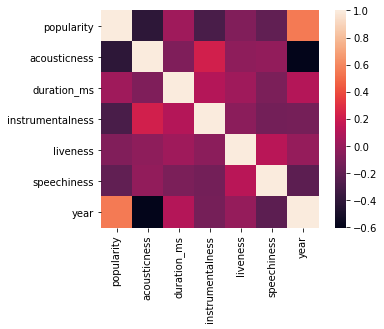

In [34]:
sns.heatmap(data_clean[['popularity', 'acousticness', 'duration_ms', 'instrumentalness', 'liveness', 'speechiness', 'year']].corr(), square=True)
plt.savefig('corr_plot.png')

In [35]:
corr = data_clean[['popularity', 'acousticness', 'duration_ms', 'instrumentalness', 'liveness', 'speechiness', 'year']].corr()
corr

,popularity,acousticness,duration_ms,instrumentalness,liveness,speechiness,year
popularity,1.000000,-0.412460,0.028130,-0.295201,-0.083778,-0.200796,0.550284
acousticness,-0.412460,1.000000,-0.087170,0.227373,-0.031257,-0.022524,-0.606799
duration_ms,0.028130,-0.087170,1.000000,0.102861,0.030858,-0.098814,0.106610
instrumentalness,-0.295201,0.227373,0.102861,1.000000,-0.045424,-0.133265,-0.126377
liveness,-0.083778,-0.031257,0.030858,-0.045424,1.000000,0.122497,-0.008488
speechiness,-0.200796,-0.022524,-0.098814,-0.133265,0.122497,1.000000,-0.221202
year,0.550284,-0.606799,0.106610,-0.126377,-0.008488,-0.221202,1.000000


Conditional distribution

In [36]:
# constructing a conditional distribution of the form p(x| y = value_y)
def cond_distribution(X_data, Y_data, x_column = 'popularity', y_column = 'year', value_y = 2015, type = None):
    data_Y_cond_y = X_data[X_data[y_column] == value_y]['acousticness']
    
    plt.hist(data_Y_cond_y, bins = 20, density = True, range = (X_data['acousticness'].min(), X_data['acousticness'].max()))
    
    plt.title('Distribution of acousticness in {0}, mean: {1}, var: {2}'.format(value_y, data_Y_cond_y.mean().round(3), data_Y_cond_y.var().round(3)))
    plt.savefig('cond_dict_1965_ac.png')
    print('Mean:', data_Y_cond_y.mean())
    print('Var:', data_Y_cond_y.var())
    

Mean: 28.839626313740755
Var: 1050.9571363089024


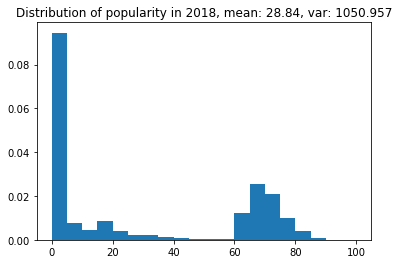

In [159]:
cond_distribution(X_data, Y_data, 'popularity', 'year', 2018)

Mean: 0.6474164133738601
Var: 5.59481799985173


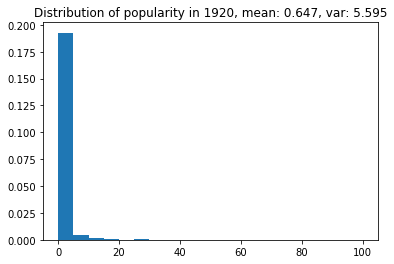

In [157]:
cond_distribution(X_data, Y_data, 'popularity', 'year', 1920)

Mean: 27.181818181818183
Var: 146.15882967607106


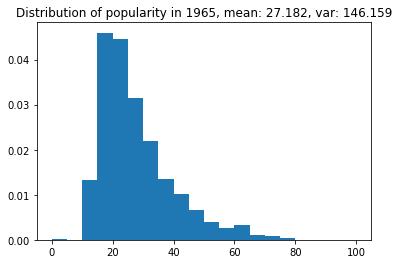

In [161]:
cond_distribution(X_data, Y_data, 'popularity', 'year', 1965)

Mean: 0.2322597637563254
Var: 0.09169903990013897


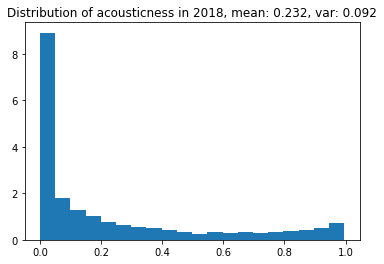

In [166]:
cond_distribution(X_data, Y_data, 'acousticness', 'year', 2018)

Confidence intervals for correlation coefficients

In [37]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [38]:
pearsonr_ci(Y_data, X_data['acousticness'])

(-0.41245970770598706, 0.0, -0.4163882430896492, -0.4085157709858244)

In [39]:
pearsonr_ci(Y_data, X_data['duration_ms'])

(0.028130488041978156,
 3.0281252503452718e-31,
 0.023390471074940116,
 0.03286924028732882)

In [40]:
pearsonr_ci(Y_data, X_data['instrumentalness'])

(-0.2952010961985763, 0.0, -0.29952484553179287, -0.2908652218377658)

In [41]:
pearsonr_ci(Y_data, X_data['liveness'])

(-0.08377755841981992,
 1.6102186345379705e-263,
 -0.08848553493691179,
 -0.07906583881210454)

In [42]:
pearsonr_ci(Y_data, X_data['speechiness'])

(-0.20079575434081876, 0.0, -0.20534332284228107, -0.19623951535536235)

In [43]:
pearsonr_ci(Y_data, X_data['year'])

(0.5502842177763541, 0.0, 0.5469687086551843, 0.5535824645058686)

Calculated multiple correlation

In [44]:
det = np.linalg.det(corr)
print(det)
corr_a = corr[1:].drop('popularity', axis = 1)
det_a = np.linalg.det(corr_a)
print(det_a)
np.sqrt(1 - det/det_a)

0.31528285185703403
0.5097724292250938


0.6176749584735083

In [45]:
X_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Construction regresion models

In [46]:
import statsmodels.api as sm

scaler = MinMaxScaler()
cols = ['duration_ms', 'loudness', 'tempo']
X_data[cols] = scaler.fit_transform(X_data[cols])

model = sm.OLS(Y_data, X_data).fit()
model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                          3.809e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                        0.00
Time:                        17:25:57   Log-Likelihood:                     -7.3889e+05
No. Observations:              170752   AIC:                                  1.478e+06
Df Residuals:                  170741   BIC:                                  1.478e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness       -18.1204      0.190    -95.254      0.000     -18.493     -17.748
danceability         9.0207      0.336     26.874      0.000       8.363       9.679
duration_ms        -11.5973      1.661     -6.982      0.000     -14.853      -8.342
energy               4.9673      0.359     13.853      0.000       4.265       5.670
instrumentalness   -16.8832      0.150   -112.896      0.000     -17.176     -16.590
liveness            -9.4267      0.257    -36.726      0.000      -9.930      -8.924
loudness            -5.5173      0.883     -6.251      0.000      -7.247      -3.787
speechiness        -28.5397      0.270   -105.722      0.000     -29.069     -28.011
tempo               -1.4217      0.376     -3.783      0.000      -2.158      -0.685
valence             -7.7938      0.221    -35.194      0.000      -8.228      -7.360
year                 0.0232      0.000     73.693      0.000       0.023       0.024
==============================================================================
Omnibus:                     1292.525   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.326
Skew:                           0.192   Prob(JB):                    1.05e-275
Kurtosis:                       2.824   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame(pd.Series([variance_inflation_factor(X_data.values, i) 
               for i in range(X_data.shape[1])], 
              index=X_data.columns), columns = ['VIF'])

,VIF
acousticness,7.270295
danceability,18.231508
duration_ms,3.624074
energy,19.945594
instrumentalness,1.672452
liveness,2.597110
loudness,229.021411
speechiness,1.668360
tempo,17.677110
valence,8.631529


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(Y_data, model.predict(X_data), squared = False)

18.325682989773263

In [49]:
mean_absolute_error(Y_data, model.predict(X_data))

14.675874522994174

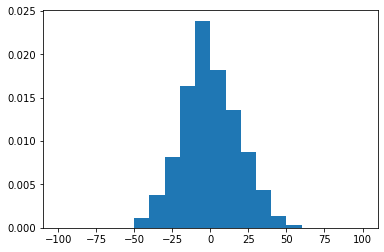

In [50]:
plt.hist(Y_data - model.predict(X_data), density = True, range = (-100, 100), bins = 20)
plt.savefig('model1_err.png')

In [51]:
from scipy.stats import shapiro, normaltest

In [52]:
(Y_data - model.predict(X_data)).mean(), (Y_data - model.predict(X_data)).std(), shapiro(Y_data - model.predict(X_data))

C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(-0.061432803304759254,
 18.325633681161705,
 ShapiroResult(statistic=0.9955610036849976, pvalue=0.0))

In [53]:
X_data = X_data.drop(['danceability', 'energy', 'tempo', 'loudness', 'valence'], axis = 1)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X_data.values, i) 
               for i in range(X_data.shape[1])], 
              index=X_data.columns)

acousticness        2.877939
duration_ms         3.505396
instrumentalness    1.456902
liveness            2.412319
speechiness         1.383272
year                7.161606
dtype: float64

In [55]:

model = sm.OLS(Y_data, X_data).fit()
model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                          6.901e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                        0.00
Time:                        17:26:01   Log-Likelihood:                     -7.3960e+05
No. Observations:              170752   AIC:                                  1.479e+06
Df Residuals:                  170746   BIC:                                  1.479e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness       -20.2655      0.120   -168.610      0.000     -20.501     -20.030
duration_ms         -3.7757      1.640     -2.302      0.021      -6.991      -0.561
instrumentalness   -16.2732      0.140   -116.100      0.000     -16.548     -15.998
liveness            -9.8066      0.248    -39.476      0.000     -10.294      -9.320
speechiness        -27.0720      0.247   -109.674      0.000     -27.556     -26.588
year                 0.0226   6.03e-05    374.475      0.000       0.022       0.023
==============================================================================
Omnibus:                     2073.810   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2083.082
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       2.821   Cond. No.                     7.28e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(Y_data, model.predict(X_data), squared = False)

18.40306684546295

In [57]:
mean_absolute_error(Y_data, model.predict(X_data))

14.78789150059254

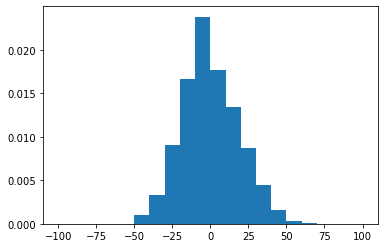

In [58]:
plt.hist(Y_data - model.predict(X_data), density = True, range = (-100, 100), bins = 20)
plt.savefig('model2_err.png')

In [59]:
(Y_data - model.predict(X_data)).mean(), (Y_data - model.predict(X_data)).std(), shapiro(Y_data - model.predict(X_data))

C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(-0.0667777670751172,
 18.402999577610608,
 ShapiroResult(statistic=0.9935173392295837, pvalue=0.0))

In [60]:
 
model = sm.OLS(Y_data[X_data['year'] >=1965], X_data[X_data['year'] >=1965]).fit()
model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                          7.154e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                        0.00
Time:                        17:26:01   Log-Likelihood:                     -4.7547e+05
No. Observations:              109564   AIC:                                  9.509e+05
Df Residuals:                  109558   BIC:                                  9.510e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.3192      0.175      1.829      0.067      -0.023       0.661
duration_ms        -24.1778      2.103    -11.499      0.000     -28.299     -20.057
instrumentalness   -19.2611      0.193    -99.986      0.000     -19.639     -18.883
liveness           -11.2964      0.301    -37.549      0.000     -11.886     -10.707
speechiness         -0.3701      0.609     -0.607      0.544      -1.565       0.824
year                 0.0213   7.37e-05    288.966      0.000       0.021       0.021
==============================================================================
Omnibus:                     1227.279   Durbin-Watson:                   2.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.087
Skew:                          -0.160   Prob(JB):                    1.67e-215
Kurtosis:                       2.662   Cond. No.                     7.48e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(Y_data[X_data['year'] >=1965], model.predict(X_data[X_data['year'] >=1965]), squared = False)

18.554044779779726

In [62]:
mean_absolute_error(Y_data[X_data['year'] >=1965], model.predict(X_data[X_data['year'] >=1965]))

14.89332111095956

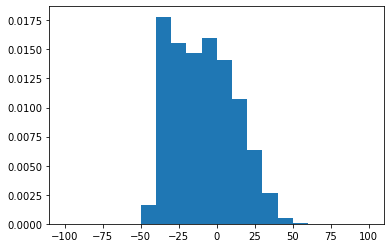

In [63]:
plt.hist(Y_data - model.predict(X_data), density = True, range = (-100, 100), bins = 20)
plt.savefig('model3_err.png')

In [64]:
(Y_data - model.predict(X_data)).mean(), (Y_data - model.predict(X_data)).std(), normaltest(Y_data - model.predict(X_data))

(-8.921464760727472,
 20.528552813381488,
 NormaltestResult(statistic=16635.89765894046, pvalue=0.0))

In [65]:
data_clean[['popularity', 'acousticness', 'duration_ms', 'instrumentalness', 'liveness', 'speechiness', 'year']].cov()

,popularity,acousticness,duration_ms,instrumentalness,liveness,speechiness,year
popularity,476.494543,-3.411146,9.045095e+04,-2.135861,-0.330876,-0.805275,319.183808
acousticness,-3.411146,0.143542,-4.864765e+03,0.028553,-0.002143,-0.001568,-6.108850
duration_ms,90450.949769,-4864.764637,2.169770e+10,5022.074646,822.399033,-2674.159113,417283.905188
instrumentalness,-2.135861,0.028553,5.022075e+03,0.109863,-0.002724,-0.008115,-1.113064
liveness,-0.330876,-0.002143,8.223990e+02,-0.002724,0.032735,0.004072,-0.040806
speechiness,-0.805275,-0.001568,-2.674159e+03,-0.008115,0.004072,0.033754,-1.079877
year,319.183808,-6.108850,4.172839e+05,-1.113064,-0.040806,-1.079877,706.073085
